## **Task 2 Contract Clasification:** Classify each contract into the corresponding classes

Class: CS987

Group: AE

Andrea Oteo: 202059017, Ane Etxeandia Erauskin: 202077594, Crawford Middleton: 202082754, Daragh McCarthy: 202075755, Elijah Reid: 202093659

# Please Read Before Running Notebook:
**Three Layer Neural Network** uses Tensorflow version 1.x

**LSTM & GRU** use Tensorflow version 2.4.1

Choose which cell to run below. Notebook will require restart when switching in between.

In [ ]:
# For 3 Layer NN, Run...
#########################
"""
!pip install tensorflow==2.4.1
import tensorflow
print(tensorflow.__version__)
from tensorflow import keras
from tensorflow import initializers
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [133]:
# For LSTM and GRU, Uncomment and Run...
#########################

%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
from tensorflow import keras
from tensorflow import initializers
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

1.15.2


# Overview and Abstract

This notebook tackles the contract classification multi labelling task using five models: Logistic Regression (Basic Machine Learning Model), 3 Layer Dense Network, LSTM, GRU and BERT. The report will outline the methods used, results and future recommendations. Following the references, the code for all models is included, starting with functions, data reading and preprocessing. Finally, the code is broken down by model.

The Logistic Regression was used as it was understandable, explainable and simple to model to implement, providing a valuable benchmark for more complex neural networks to be compared against with an Mean-F1 score of 0.64. The best Deep Dense surprisingly had surprisingly few layers with only 3 resulting in a Mean-F1 of 0.56, lower than the Base ML. The LSTM and GRU models had a similar architecture with Mean-F1 scores of 0.48 and 0.51 respectively. Finally, the BERT model had the best Mean-F1 score of 0.75, but it failed to achieve the target Mean-F1 score of 0.90+.

# Methods

###  Describe the data processing, feature extraction performed and reasoning.

**Base ML Model- Logistic Regression**

The description feature was cleaned used the clean function outlined in the functions section in order to make it improve readibility for the logistic regression model. This step was common across all models in this report. Next, the tfidvectorizer was instantiated on used on the text data in order learn the vocabulary in the training data which was then used it to create a document-term matrix. The vectorizer will tokenize the documents, learn the vocabulary and inverse document frequency weightings, and enabling the model to encode new documents.


**Dense Deep Network (3 layer)**: The data cleaning for this model starts deleting the columns that were not considered to provide useful information to the model. 
Those columns are: publication_date, country_code, country_name, sector, value, description and awarding_authority. The country_code, country_name and sector were removed because all instances had the same value in that column. The others have been deleted due to the difficulty of transforming them into dummie variables because of their many different values.
The “title” column contains two pieces of information: the city and the title. For this reason, it has been separated in order to create an additional feature with the name of the city. In the column "nature of contract" there is just one instance with the "Combined" value in the test dataset. There are no instances containing this value in the training set. Therefore, and as it is not possible to delete rows from the test dataset, this instance has been treated as if it had the most common value in this column: work.
In the "title" and "city" columns there are a lot of different values. In order not to make a huge dataset when creating the dummie variables, it has been decided to create dummies for only the most important ones, and to assign the other ones the value 'other'.
In the "category" column each instance can have more than one category, so the MultiLabelBinarizer was used to create the dummy variables. 

  **LSTM, GRU and BERT**: the models are able to read natural language so categorical variables have been used to train the model. For this purpose, all the variables that can provide useful information have been joined in a single column called "features". Afterwards, the model has been processed by removing capital letters, punctuation marks and any other symbol that does not provide information. Stopwords have also been deleted and lemmatisation has been applied to the dataset. A Tokenizer instance is fitted "fit_on_texts" to the corpus creating a vocabulary index based on word frequency. Every word is mapped to an index, so every word gets a unique integer value, lower integer means more frequent words. The size of words to keep is defined by the num_words parameter, in this case, "vocabulary_size". Only the most common words will be kept. The sentences from the input are then mapped to integers using the "tokenizer.texts_to_sequences" method. For the "categories" column, which contains the different classes, a method called MultiLabelBinarizer has been applied that allows you to encode multiple labels per instance. To translate the resulting array, a DataFrame is built with this array and the encoded classes and it is added to the one we had. 
Finally, in order to create embeddings, all of the sentences need to be of same length. Therefore, the "pad_sequences" is used to pad each sentence with zero. At the end, the dataset is split in trining and test set.

### Describe the baseline model to be used (and why it was selected)





The standard machine learning baseline model that we have selected was logistic regression. The algorithm estimates the probability of each document belonging to the 9 different categories.  If the estimated probability for a category is above 0.5 the algortihm will predict the document belongs to that category by labelling 1. In contrast, if the estimated probability is below 0.5 then the algorithm will predict the document doesn't belong to the category by labelling it 0. The algorithm is appropriate for the dataset as it is a binary classification, which is predicting a yes/no outcome. The logistic regression is a good baseline model as it is easy to implement with a fast learning rate. 

### Describe each neural model configuration / setup that will be used.


 **Dense Deep Network:** A neural network of three dense layers, each with 50 neurons, has been constructed. The SELU function has been chosen as the activation function, which solves the vanishing gradient problem, since the output of each layer will tend to preserve a mean
of 0 and standard deviation of 1 during training. As kernel initializer, the lecun_normal has been chosen as the use of the SELU activation function requires it. Dropouts with a rate of 0.5 have been used as a regularisation technique in order to improve the score. Finally, the output layer has 9 neurons, one for each class, and the sigmoid activation function has been used, giving as output a number between 0 and 1 that represents the probability that the instance belongs to each class. Adam with a learning rate of 0.001 has been used as an optimiser as it is one of the preferred optimisation algorithms in existence. 

   **LSTM/GRU:** In this case the input sequences are words and we have approximately 6000 words per instance. However, a reasonable limit of 250-500 max sequence length is often used in practice with large LSTM models. For building this model we'll use the Keras functional API and not the common used Sequential() model. This is because with this API it's possible to build more complex models, such as multi-output and multi-inputs problems.
We will be training our own embeddings using Keras Embedding Layer. A Convolutional layer was added before the LSTM in order to speed-up the training time. A Dense layer is created for each of ouput. The corresponding metrics and losses for each output will also be stored into dictionaries. For each output we define the weight in a dictionary format (class 5 is different from the rest) and these values are obtained through calculations. Early stopping is implemented to help limit overfitting. Finally, a Model class is instantiated and the model is trained. 

   **BERT**: The same data cleaning was applied to BERT and the max sequence length was set at 250. The model used the huggingface PyTorch library. Beforehand, the text data was split into tokens and mapped to their index in the tokenizer library. The final model used "multilingual-base-cased" as the text was german. The text was procesed for bert by truncating the sentence length to a maximum of 250 as the majority of text data was shorter than this limit. The final model was trained over three epochs in order to avoid overfitting, with batch size of 16 and a learning rate of 2e-5. The AdamW optimizer was used as it is a class from the hugginface library. A weight decay of 0.1 was used.


### Model Functions and Classes

Standard Machine Learning Model

https://colab.research.google.com/drive/1y8C8yFfLOHLuA-al00I0TrdgXFiNdg9b#scrollTo=4h2z_HpkyOfR&line=1&uniqifier=1

Dense Deep Network

https://colab.research.google.com/drive/1y8C8yFfLOHLuA-al00I0TrdgXFiNdg9b#scrollTo=hHVTQ5Evygr5


LSTM Network

https://colab.research.google.com/drive/1y8C8yFfLOHLuA-al00I0TrdgXFiNdg9b#scrollTo=HV6WHtytyhF_

GRU Network

https://colab.research.google.com/drive/1y8C8yFfLOHLuA-al00I0TrdgXFiNdg9b#scrollTo=ChBpYjMtyoZ9&line=1&uniqifier=1

BERT Network

https://colab.research.google.com/drive/1y8C8yFfLOHLuA-al00I0TrdgXFiNdg9b#scrollTo=uqhixX7lyrdP&line=1&uniqifier=1

### Describe the training schedule and approach that you undertook.

**LSTM and GRU:** Both networks used to the Adadelta optimizer whichis an extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate. 

**BERT**: The BERT model used the Pytorch Linear learning rate schedule in order to find the optimal learning rate while using the adaptive AdamW optimizer. The final model used a learning rate of 2e-5 with a weight decay of 0.1. The weight_decay parameter adds a L2 penalty to the cost can lead to smaller model weights. The Learning Schedule did not improve the highest kaggle score above 75%. It would appear that the learning schedule has not been optimally integrated into the neural network.

### Describe any other things that you did or tried in order to improve performance  

**Baseline Model:** We noticed there was an imbalance within the dataset due to a higher percentage of Infrastructure & Construction instances within the labels. We balanced the data by using the smote technique, which saw no improvement on the kaggle score. 

**Dense Neural Network:** RandomizedSearchCV has been used to search for the most suitable hyperparameters for the dense neural network model. Different numbers of layers, numbers of neurons and learning rates have been tested. The execution time was very long, and before it finished running it was interrupted with the following error: "Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fe0a87b3450>, as the constructor either does not set or modifies parameter n_neurons". The best parameters so far have been extracted and the model has been retrained with them. The results have been worse than the ones we had before, we think it could have been due to overfitting. For this reason, other combinations have been randomly tested and finally we have left the one that gave the best results. 

**Bert:** XLNet model was also constructed from the hugginface library with 'english-base-cased' which led to 5% lower mean-f1 on kaggle. The final Bert model was  run without the same text cleaning as used in LSTM and GRU. This was done to investigate the influence of this technique on performance. It consequently led to a 5% reduction in performance. A final comparison was constructed by using only the description instead of the features, and it again underperformed by approximately 5%. The model was run with one, two and three epochs. There was no clear difference in performance betweent the three levels.


# Results and Discussion


**Scores from Kaggle Leaderboard**
 - The Basic model: 0.64 Mean-F1 score on kaggle leaderboard

 - The Dense Deep Model: 0.55 Mean-F1 score on kaggle leaderboard

 - The LSTM Network: 0.50 Mean-F1 on Kaggle leaderboard.

 - The GRU Network: 0.48 Mean-F1 on Kaggle leaderboard. It performs a little bit worst than LSTM. In addition, being a simpler model with which the execution time should be reduced with respect to LSTM, this has not been the case. The execution time was very similar. 

 - The BERT Network: 0.75 Mean-F1 on Kaggle leaderboard using the multingual-based-cased hugginface library with Pytorch. This model fared better than XLNet (5% improvement). 

**Table of Approaches with parameter settings and performances**

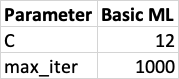

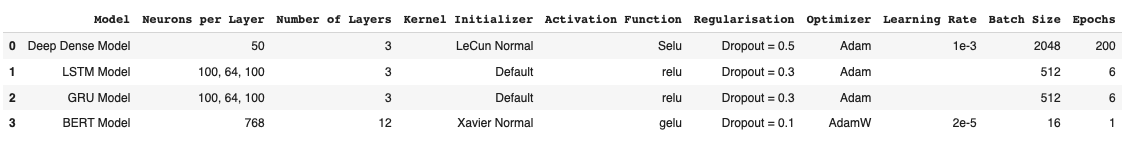

### Explain your findings: What worked, and why?

  **Baseline Model:**
  It was clear the best standard machine learning baseline model was the logistic regression as it scored 55% on the kaggle leaderboard. One of the reasons for the logistic regression models outperforming other models could be due to its high bias/low variance algorithm which seemed to work well with the multilabel dataset. 

  **Bert:** 
 The Bert model successfully ran and achieved 75% accuracy on the Kaggle leaderboard. It also served as a benchmark for testing a variety of parameters, and techniques such as data cleaning and imbalancing. The was enabled by following a simple and conventional approach to setting up the data, the necessary bert pre-processing, Bert classes and network design. 

  **Dense Deep Network:** 
The Dense Deep model of three layers succesfully ran and achieved 55% f1 score on the Kaggle leaderboard. In the pre-processing of the data, an augmentation of the data was successfully made by extracting one more feature which has helped to improve the performance of the model

  **LSTM & GRU:**
 Both of the models have successfully run and achieved 50% accuracy on the Kaggle leaderboard. The data cleaning and preprocessing worked for these models as well as for BERT, which is an advantage in terms of saving time and effort. Since the model is a multilabel classification the multilabelbinariser preprocessing method is the one that works for this. 

### What didn’t work, and why? 


 **Bert:** 
 The model was expected to reach 90% plus as it is well-suited to this type of challenge. The large array of parameters available and the complexity in setting up the model architecture warrants revisiting each decision required to set up Bert from start to finish to identify areas of improvement in a systematic way.

  **Dense Deep Network:** 
The model only predicts one of the classes, which happens to be the class that has the most instances in the training data. Techniques like oversampling and assigning different weights to the classes have been tried, but they did not help to solve the problem. A hyperparameter analysis of the model has also been carried out. It was thought that more layers in the model would help to improve performance, but it turned out that the best performance was obtained with three layers. 

  **LSTM & GRU:**
  First of all, we tried to use the methos "one-hot-encoding" in order to set up the classes, but we realised that this method is not adequate for a multilaber problem. We fixed this and the Kaggle score increased considerably. In addition, the fact that the model has a maximum limit of 250-500 max sequence length makes it impossible to enter the 6000 words that have been used as features to train the model. That is why it is possible that if the model could be trained with all the available information, the score would increase.

  **Baseline:**
  Alternative shallow methods were used in our analysis. The second best model was support vector machine, which scored 7% less accuarcy in kaggle than the logistic regression model. The random forest and decision trees algorithms produced the third best Kaggle score with 39%. The smote technique was used to address the imbalance within the dataset, this showed no improvement on the logistic regression model as the kaggle score dropped from 55% to 5%


### Which features were the most important? 

**Bert, LSTM & GRU:**
The two options that were used were the feature among all the columns and only using the description. Suprisingly, the description feature on its own led to a lower accuracy score of 70% vs. 75%. This may be attributable to incorrect set up of max sequence length or tokenization. This should be re-examined in future experimentation.
 

### When does the model fail? 


The standard machine learning baseline models which failed were an ensemble learning approach & naive bayes. The models were not supported to a multi-label & multi-output classification. The deep dense model fails when training it with imbalanced data. Other techniques to handle the unbalanced data should be tried to solve the problem and make the model predict more classes. Regarding LSTM and GRU, when the sequence length is higher than 600 the model fails. It could be because it has a maximum limit as mentioned earlier. It also happened that when a lot of epochs are set up, the model stops abruptly. Meanwhile, the report found that one of the main restrictions when using Bert is the memory required to train which creates a time cost when testing a variety of parameters, imbalance techniques and model architectures, etc. 



# Summary and Recommendation

The dataset required significant data pre-processing and feature selection in order to handle the text-based data. In the *Code Preprocessing* section, different methods were taken for each model. Furthermore, the complex nature of the neural networks used in terms of parameter choices and choice of libraries means that the models may not be optimially configured for this task. Going forward, each model should be analyed step-by-step to identify problems in model design and parameter selection. 

Overall, the logistic regression had the best success as it's mean-f1 score was only 0.1 behind the highest performing BERT network. Meanwhile, we expected higher results from all of the neural network models. We believe this is attributable to sub-optimal model archicture and parameter selection due to the higher scores on the Kaggle leadership and the layers of complexity associated with these text-based models.

# References

- Aurélien Géron (September 2019) Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition edn., US: O'Reilly Media, Inc.
- Daniel Da Costa (May 2020) *Text Classifier with Multiple Outputs and Multiple Losses in Keras*, Available at: https://towardsdatascience.com/text-classifier-with-multiple-outputs-and-multiple-losses-in-keras-4b7a527eb858


# Code - Packages

In [134]:
# Include your packages/imports here.

from google.colab import files
from google.colab import drive

import os
import math

import re
from sqlalchemy import create_engine
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from numpy import array
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, GRU
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import tensorflow
print(tensorflow.__version__)
from tensorflow import keras
from tensorflow import initializers
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# install earlier version of transformers
!pip install transformers==2.1.1
import torch
from torch.optim.lr_scheduler import LambdaLR
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig, BertModel, BertTokenizer
from tqdm import tqdm, trange
from torch.optim.lr_scheduler import LambdaLR

from ast import literal_eval
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras import backend as K
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report, multilabel_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

1.15.2


# Code - Functions

In [135]:
# Sets up all the metrics that allow for the f1_score to be calculated
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [136]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [137]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [138]:
def cleaning(sen):

  clean = re.sub(r"""
               [,.;@#-/\"'():!?!&$]+  # Accept one or more copies of punctuation
               \ *           # plus zero or more copies of a space,
               """,
               " ",          # and replace it with a single space
               sen, flags=re.VERBOSE)
  clean= clean.replace("Germany","")

  clean=re.sub(' +', ' ', clean)

  return (clean)

In [139]:
def clean_text_nn(text):
    text = text.lower()    
    text = text.split()
    stop_words = stopwords.words("german")
    text = [tok for tok in text if tok not in stop_words]
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(w) for w in text]
    return ' '.join(text)

In [140]:
# custom function - 3 layer
def Evaluate(model_name):
  test_predictions = model.predict(test_features)
  test_predictions.round(0)

  results = model.evaluate(test_features, test_labels, verbose=0)

  for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)

  return Evaluate

In [141]:
# BERT
def plot_sentence_embeddings_length(text_list, tokenizer):
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t), text_list))
    tokenized_texts_len = list(map(lambda t: len(t), tokenized_texts))
    fig, ax = plt.subplots(figsize=(8, 5));
    ax.hist(tokenized_texts_len, bins=40);
    ax.set_xlabel("Length of Comment Embeddings");
    ax.set_ylabel("Number of Comments");
    return

In [142]:
# BERT
def tokenize_inputs(text_list, tokenizer, num_embeddings=256):
    """
    Tokenizes the input text input into ids. Appends the appropriate special
    characters to the end of the text to denote end of sentence. Truncate or pad
    the appropriate sequence length.
    """
    # tokenize the text, then truncate sequence to the desired length minus 2 for
    # the 2 special characters
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t)[:num_embeddings-2], text_list))
    # convert tokenized text into numeric ids for the appropriate LM
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    # append special token "<s>" and </s> to end of sentence
    input_ids = [tokenizer.build_inputs_with_special_tokens(x) for x in input_ids]
    # pad sequences
    input_ids = pad_sequences(input_ids, maxlen=num_embeddings, dtype="long", truncating="post", padding="post")
    return input_ids

In [143]:
# BERT
def create_attn_masks(input_ids):
    """
    Create attention masks to tell model whether attention should be applied to
    the input id tokens. Do not want to perform attention on padding tokens.
    """
    # Create attention masks
    attention_masks = []

    # Create a mask of 1s for each token followed by 0s for padding
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)
    return attention_masks

In [144]:
# code for creating parameter table
DD_HP = {"Model": "Deep Dense Model",
          "Neurons per Layer": "50",
          "Number of Layers": "3",
          "Kernel Initializer": "LeCun Normal",
          "Activation Function": "Selu",
          "Regularisation": "Dropout = 0.5",
          "Optimizer": "Adam",
          "Learning Rate": "1e-3",
          "Batch Size" : "2048",
          "Epochs": "200"}

LSTM_HP = {"Model": "LSTM Model",
          "Neurons per Layer": "100, 64, 100",
          "Number of Layers": "3",
          "Kernel Initializer": "Default",
          "Activation Function": "relu",
          "Regularisation": "Dropout = 0.3",
          "Optimizer": "Adam",
          "Learning Rate": "",
          "Batch Size" : "512",
          "Epochs": "6"}

GRU_HP = {"Model": "GRU Model",
          "Neurons per Layer": "100, 64, 100",
          "Number of Layers": "3",
          "Kernel Initializer": "Default",
          "Activation Function": "relu",
          "Regularisation": "Dropout = 0.3",
          "Optimizer": "Adam",
          "Learning Rate": "",
          "Batch Size" : "512",
          "Epochs": "6"}
          
BERT_HP = {"Model": "BERT Model",
          "Neurons per Layer": "768",
          "Number of Layers": "12",
          "Kernel Initializer": "Xavier Normal",
          "Activation Function": "gelu",
          "Regularisation": "Dropout = 0.1",
          "Optimizer": "AdamW",
          "Learning Rate": "2e-5",
          "Batch Size" : "16",
          "Epochs": "1"}


In [145]:
hyp_dict = [DD_HP, LSTM_HP, GRU_HP, BERT_HP]

hyp_df = pd.DataFrame(hyp_dict)
hyp_df

,Model,Neurons per Layer,Number of Layers,Kernel Initializer,Activation Function,Regularisation,Optimizer,Learning Rate,Batch Size,Epochs
0,Deep Dense Model,50,3,LeCun Normal,Selu,Dropout = 0.5,Adam,1e-3,2048,200
1,LSTM Model,"100, 64, 100",3,Default,relu,Dropout = 0.3,Adam,,512,6
2,GRU Model,"100, 64, 100",3,Default,relu,Dropout = 0.3,Adam,,512,6
3,BERT Model,768,12,Xavier Normal,gelu,Dropout = 0.1,AdamW,2e-5,16,1


# Code - Read Data

In [146]:
# Load Data from public google drive URL
train_URL = 'https://drive.google.com/file/d/12U6D9dyz7JVcBQ27T46R8m1rDB0YDoyH/view?usp=sharing'
train_csv = 'https://drive.google.com/uc?export=download&id='+train_URL.split('/')[-2]
test_URL = 'https://drive.google.com/file/d/1Mc6oNhvtPTr8pS7vLrTHkWUR3XDgR-FH/view?usp=sharing'
test_csv = 'https://drive.google.com/uc?export=download&id='+test_URL.split('/')[-2]

# Code - Preprocessing


### Base ML Preprocessing

In [100]:
train_base = pd.read_csv(train_csv, dtype={
        "docid":str,
        "publication_date":str,
        "contract_type":str,
        "nature_of_contract":str,
        "country_code":str,
        "country_name":str,
        "sector":str,
        "category":str,
        "value":float,
        "title":str,
        "description":str,
        "awarding_authority":str,
        "complete_entry":str,
        "label":str   
    })

test_base = pd.read_csv(test_csv, dtype={
        "docid":str,
        "publication_date":str,
        "contract_type":str,
        "nature_of_contract":str,
        "country_code":str,
        "country_name":str,
        "sector":str,
        "category":str,
        "value":float,
        "title":str,
        "description":str,
        "awarding_authority":str,
        "complete_entry":str
    })

In [101]:
# drop columns
train_base = train_base.drop(['docid', 'publication_date', 'contract_type', 'nature_of_contract', 'country_code', 'country_name', 'sector', 'value', 'title', "country_code","country_name", "sector", "label", "awarding_authority"], axis=1)
test_base = test_base.drop(['docid', 'publication_date', 'contract_type', 'nature_of_contract', 'country_code', 'country_name', 'sector', 'value', 'title', "country_code","country_name", "sector", "awarding_authority"], axis=1)

In [102]:
# explode cpvs list to lengthen dataset
train_base['category'] = train_base['category'].apply(literal_eval) #convert to list type
train_base = train_base.explode('category')

In [103]:
# encode and bind function
train_base = encode_and_bind(train_base, 'category')
train_base = train_base.drop(['category'], axis=1)

In [104]:
cols_target = ["category_Defence", "category_Education & Culture", "category_Energy & Environment", "category_General", "category_Health & Care", "category_Infrastructure & Construction", "category_Professional Services", "category_Technology & Communications", "category_Transport & Logistics" ]

In [105]:
unlabelled_in_all = train_base[(train_base['category_Defence']!=1) & (train_base['category_Education & Culture']!=1) & (train_base['category_Energy & Environment']!=1) & 
                            (train_base['category_General']!=1) & (train_base['category_Health & Care']!=1) & (train_base['category_Infrastructure & Construction']!=1) & 
                             (train_base['category_Professional Services']!=1) & (train_base['category_Technology & Communications']!=1) & (train_base['category_Transport & Logistics']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_base)*100)

Percentage of unlabelled comments is  0.0


In [106]:
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
train_base['description'] = train_base['description'].map(lambda com : clean_text(com))

In [107]:
# clean the comment_text in test_df [Thanks, Pulkit Jha.]
test_base['description'] = test_base['description'].map(lambda com : clean_text(com))

In [108]:
X_base = train_base.description
test_X_base = test_base.description
print(X_base.shape, test_X_base.shape)

(107834,) (24581,)


In [109]:
# import and instantiate TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [110]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_dtm = vect.fit_transform(X_base)
# examine the document-term matrix created from X_train
X_dtm

<107834x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2292687 stored elements in Compressed Sparse Row format>

In [111]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X_base)
# examine the document-term matrix from X_test
test_X_dtm

<24581x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 509511 stored elements in Compressed Sparse Row format>

### Deep Dense Pre-Processing

After reading the datasets, the Title column is split in two in order to get an additional feature from that column, the city feature

In [27]:
train_dense = pd.read_csv(train_csv, dtype={
        "docid":str,
        "publication_date":str,
        "contract_type":str,
        "nature_of_contract":str,
        "country_code":str,
        "country_name":str,
        "sector":str,
        "category":str,
        "value":float,
        "title":str,
        "description":str,
        "awarding_authority":str,
        "complete_entry":str,
        "label":str   
    })

test_dense = pd.read_csv(test_csv, dtype={
        "docid":str,
        "publication_date":str,
        "contract_type":str,
        "nature_of_contract":str,
        "country_code":str,
        "country_name":str,
        "sector":str,
        "category":str,
        "value":float,
        "title":str,
        "description":str,
        "awarding_authority":str,
        "complete_entry":str
    })

In [28]:
df = pd.DataFrame(train_dense['title'].astype(str).str.split(':',1).tolist(),columns = ['1','2'])
df1 = pd.DataFrame(test_dense['title'].astype(str).str.split(':',1).tolist(),columns = ['1','2'])

In [29]:
train_dense['title'] = df['2']
test_dense['title'] = df1['2']
train_dense['city'] = df['1']
test_dense['city'] = df1['1']

Then, columns that have been considered as not contributing information to the model have been deleted from the two datasets.

In [30]:
train_dense = train_dense.drop(["publication_date","country_code","country_name", "sector", "label", "value", "description", "awarding_authority"], axis=1)
test_dense = test_dense.drop(["publication_date","country_code","country_name", "sector", "value", "description", "awarding_authority"], axis=1)

In the column "nature of contract" there is just one  "Combined" value in the test dataset. No "Combined" values in the training set. 
As it is not possible to delete rows from the test dataset, this data point have been treated as if it was the most common value in this column: work

In [31]:
train_dense['nature_of_contract'].value_counts()

works       42375
services    34575
supplies    21353
Name: nature_of_contract, dtype: int64

In [32]:
test_dense['nature_of_contract'].value_counts()

works       10440
services     8857
supplies     5282
combined        1
Name: nature_of_contract, dtype: int64

In [33]:
test_dense.loc[test_dense['nature_of_contract'].str.contains("combined", na=False),['nature_of_contract']] = 'works'

In [34]:
train = train_dense.copy()
test = test_dense.copy()

In the "title" and "city" columns there are a lot of different values. In order not to make a huge dataset when passing the different values of these features to columns, it has been decided to create dummie variables for only the most important ones, and to assign the other ones the value 'other'.

In [35]:
train['Title'] = 'other'
train.loc[train['title'].str.contains("Construction work", na=False),['Title']] = 'Construction work'
train.loc[train['title'].str.contains("Architectural, construction, engineering and inspection services", na=False),['Title']] = 'Architectural, construction, engineering and inspection services'
train.loc[train['title'].str.contains("Engineering services", na=False),['Title']] = 'Engineering services'
train.loc[train['title'].str.contains("Architectural, engineering and planning services", na=False),['Title']] = 'Architectural, engineering and planning services'
train.loc[train['title'].str.contains("Railway construction works", na=False),['Title']] = 'Railway construction works'
train.loc[train['title'].str.contains("Pharmaceutical products", na=False),['Title']] = 'Pharmaceutical products'
train.loc[train['title'].str.contains("IT services: consulting, software development, Internet and support", na=False),['Title']] = 'IT services: consulting, software development, Internet and support'
train.loc[train['title'].str.contains("Building-cleaning services", na=False),['Title']] = 'Building-cleaning services'
train.loc[train['title'].str.contains("Metalworking", na=False),['Title']] = 'Metalworking'
train.loc[train['title'].str.contains("Architectural and related services", na=False),['Title']] = 'Architectural and related services'
train.loc[train['title'].str.contains("Firefighting vehicles", na=False),['Title']] = 'Firefighting vehicles'
train.loc[train['title'].str.contains("Structural shell work", na=False),['Title']] = 'Structural shell work'
train = pd.get_dummies(data = train, columns=['Title'])

In [36]:
test['Title'] = 'other'
test.loc[test['title'].str.contains("Construction work", na=False),['Title']] = 'Construction work'
test.loc[test['title'].str.contains("Architectural, construction, engineering and inspection services", na=False),['Title']] = 'Architectural, construction, engineering and inspection services'
test.loc[test['title'].str.contains("Engineering services", na=False),['Title']] = 'Engineering services'
test.loc[test['title'].str.contains("Architectural, engineering and planning services", na=False),['Title']] = 'Architectural, engineering and planning services'
test.loc[test['title'].str.contains("Railway construction works", na=False),['Title']] = 'Railway construction works'
test.loc[test['title'].str.contains("Pharmaceutical products", na=False),['Title']] = 'Pharmaceutical products'
test.loc[test['title'].str.contains("IT services: consulting, software development, Internet and support", na=False),['Title']] = 'IT services: consulting, software development, Internet and support'
test.loc[test['title'].str.contains("Building-cleaning services", na=False),['Title']] = 'Building-cleaning services'
test.loc[test['title'].str.contains("Metalworking", na=False),['Title']] = 'Metalworking'
test.loc[test['title'].str.contains("Architectural and related services", na=False),['Title']] = 'Architectural and related services'
test.loc[test['title'].str.contains("Firefighting vehicles", na=False),['Title']] = 'Firefighting vehicles'
test.loc[test['title'].str.contains("Structural shell work", na=False),['Title']] = 'Structural shell work'
test = pd.get_dummies(data = test, columns=['Title'])

In [37]:
train['general_city'] = 'other'
train.loc[train['city'].str.contains("Germany-Frankfurt-on-Main", na=False),['general_city']] = 'Germany-Frankfurt-on-Main'
train.loc[train['city'].str.contains("Germany-Berlin", na=False),['general_city']] = 'Germany-Berlin'
train.loc[train['city'].str.contains("Germany-Munich", na=False),['general_city']] = 'Germany-Munich'
train.loc[train['city'].str.contains("Germany-Hamburg", na=False),['general_city']] = 'Germany-Hamburg'
train.loc[train['city'].str.contains("Germany-Dresden", na=False),['general_city']] = 'Germany-Dresden'
train.loc[train['city'].str.contains("Germany-Düsseldorf", na=False),['general_city']] = 'Germany-Düsseldorf'
train.loc[train['city'].str.contains("Germany-Bonn", na=False),['general_city']] = 'Germany-Bonn'
train.loc[train['city'].str.contains("Germany-Stuttgart", na=False),['general_city']] = 'Germany-Stuttgart'
train.loc[train['city'].str.contains("Germany-Hanover", na=False),['general_city']] = 'Germany-Hanover'
train.loc[train['city'].str.contains("Germany-Cologne", na=False),['general_city']] = 'Germany-Cologne'
train.loc[train['city'].str.contains("Germany-Nuremberg", na=False),['general_city']] = 'Germany-Nuremberg'
train.loc[train['city'].str.contains("Germany-Leipzig", na=False),['general_city']] = 'Germany-Leipzig'
train.loc[train['city'].str.contains("Germany-Karlsruhe", na=False),['general_city']] = 'Germany-Karlsruhe'
train = pd.get_dummies(data = train, columns=['general_city'])

In [38]:
test['general_city'] = 'other'
test.loc[test['city'].str.contains("Germany-Frankfurt-on-Main", na=False),['general_city']] = 'Germany-Frankfurt-on-Main'
test.loc[test['city'].str.contains("Germany-Berlin", na=False),['general_city']] = 'Germany-Berlin'
test.loc[test['city'].str.contains("Germany-Munich", na=False),['general_city']] = 'Germany-Munich'
test.loc[test['city'].str.contains("Germany-Hamburg", na=False),['general_city']] = 'Germany-Hamburg'
test.loc[test['city'].str.contains("Germany-Dresden", na=False),['general_city']] = 'Germany-Dresden'
test.loc[test['city'].str.contains("Germany-Düsseldorf", na=False),['general_city']] = 'Germany-Düsseldorf'
test.loc[test['city'].str.contains("Germany-Bonn", na=False),['general_city']] = 'Germany-Bonn'
test.loc[test['city'].str.contains("Germany-Stuttgart", na=False),['general_city']] = 'Germany-Stuttgart'
test.loc[test['city'].str.contains("Germany-Hanover", na=False),['general_city']] = 'Germany-Hanover'
test.loc[test['city'].str.contains("Germany-Cologne", na=False),['general_city']] = 'Germany-Cologne'
test.loc[test['city'].str.contains("Germany-Nuremberg", na=False),['general_city']] = 'Germany-Nuremberg'
test.loc[test['city'].str.contains("Germany-Leipzig", na=False),['general_city']] = 'Germany-Leipzig'
test.loc[test['city'].str.contains("Germany-Karlsruhe", na=False),['general_city']] = 'Germany-Karlsruhe'
test = pd.get_dummies(data = test, columns=['general_city'])

In [39]:
train = train.drop(["general_city_other","Title_other","city", "title"], axis=1)
test = test.drop(["general_city_other","Title_other","city", "title"], axis=1)

Building the dummies

In [41]:
train = encode_and_bind(train, 'contract_type')
train = encode_and_bind(train, 'nature_of_contract')
test = encode_and_bind(test, 'contract_type')
test = encode_and_bind(test, 'nature_of_contract')

In [42]:
train = train.drop(["contract_type","nature_of_contract"], axis=1)
test = test.drop(["contract_type","nature_of_contract"], axis=1)

In the "category" column each data point can have more than one category, so the MultiLabelBinarizer is used to create the dummy variables. The train1 dataframe is created with the dummie categories which afterwards is merged with the dataframe that contains the features

In [43]:
train['category'] = train['category'].apply(literal_eval) #convert to list type

In [44]:
mlb = MultiLabelBinarizer()
train1 = pd.DataFrame(mlb.fit_transform(train['category']),columns=mlb.classes_)

In [45]:
train=pd.merge(train, train1, left_index=True, right_index=True)

In [46]:
train=train.drop(['category'],axis=1)

The training data is separated into train, validation and test set in order to see the performance of the model. 

In [47]:
train_df, test_df = train_test_split(train, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

The labels are converted to array variables. And the features are scaled.

In [48]:
train_labels=np.c_[train_df['Defence'],
                   train_df['Education & Culture'],
                   train_df['Energy & Environment'],
                   train_df['General'],
                   train_df['Health & Care'],
                   train_df['Infrastructure & Construction'],
                   train_df['Professional Services'],
                   train_df['Technology & Communications'],
                   train_df['Transport & Logistics']]

In [49]:
train_labels = np.asarray(train_labels).astype('float32').reshape((-1,9))

In [50]:
bool_train_labels = train_labels != 0

In [51]:
val_labels = np.c_[val_df['Defence'],
                   val_df['Education & Culture'],
                   val_df['Energy & Environment'],
                   val_df['General'],
                   val_df['Health & Care'],
                   val_df['Infrastructure & Construction'],
                   val_df['Professional Services'],
                   val_df['Technology & Communications'],
                   val_df['Transport & Logistics']]

In [52]:
val_labels = np.asarray(val_labels).astype('float32').reshape((-1,9))

In [53]:
test_labels = np.c_[test_df['Defence'],
                   test_df['Education & Culture'],
                   test_df['Energy & Environment'],
                   test_df['General'],
                   test_df['Health & Care'],
                   test_df['Infrastructure & Construction'],
                   test_df['Professional Services'],
                   test_df['Technology & Communications'],
                   test_df['Transport & Logistics']]

In [54]:
test_labels = np.asarray(test_labels).astype('float32').reshape((-1,9))

In [55]:
train_labels_df = train_df[['Defence',
                         'Education & Culture',
                         'Energy & Environment',
                         'General',
                         'Health & Care',
                         'Infrastructure & Construction',
                         'Professional Services',
                         'Technology & Communications',
                         'Transport & Logistics']].copy()

In [56]:
train_features=train_df.iloc[:,1:31]
val_features=val_df.iloc[:,1:31]
test_features=test_df.iloc[:,1:31]

In [57]:
real_test_docid=test.iloc[:,0]

In [145]:
real_test_features=test.iloc[:,1:31]

In [59]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

In [60]:
# assign data for dense model to run
train_features_dense = train_features.copy()
val_features_dense = val_features.copy()
test_features_dense = test_features.copy()

train_labels_dense = train_labels_df.copy()
val_labels_dense = val_labels.copy()
test_labels_dense = test_labels.copy()


RandomizedSearchCV for the most suitable hyperparameters

In [61]:
keras.backend.clear_session()
np.random.seed(42)

In [62]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=train_features.shape[1:]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="selu",kernel_initializer="lecun_normal"))
    model.add(keras.layers.Dense(9, activation="sigmoid"))
    optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.9, decay=0.01)
    model.compile(loss="binary_crossentropy", optimizer=optimizer)
    return model

In [63]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [64]:
"""
param_distribs = {
    "n_hidden": [3,4,5,6,7,8],
    "n_neurons": np.arange(1, 100),
    "learning_rate": [3e-2,3e-3,3e-4],
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(train_features, train_labels, epochs=100,
                  validation_data=(val_features, val_labels),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])
"""                  

'\nparam_distribs = {\n    "n_hidden": [3,4,5,6,7,8],\n    "n_neurons": np.arange(1, 100),\n    "learning_rate": [3e-2,3e-3,3e-4],\n}\n\nrnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)\nrnd_search_cv.fit(train_features, train_labels, epochs=100,\n                  validation_data=(val_features, val_labels),\n                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])\n'

In [65]:
#rnd_search_cv.best_params_

Dense deep learning: 6 layers, 89 neurons --> 0.399 score in Kaggle

### LSTM and GRU preprocessing

Read the dataset 

In [147]:
train_nn = pd.read_csv(train_csv,  dtype={
        "docid":str,
        "publication_date":str,
        "contract_type":str,
        "nature_of_contract":str,
        "country_code":str,
        "country_name":str,
        "sector":str,
        "category":str,
        "value":float,
        "title":str,
        "description":str,
        "awarding_authority":str,
        "complete_entry":str,
        "label":str   
    })

In [148]:
test_nn = pd.read_csv(test_csv,  dtype={
        "docid":str,
        "publication_date":str,
        "contract_type":str,
        "nature_of_contract":str,
        "country_code":str,
        "country_name":str,
        "sector":str,
        "category":str,
        "value":float,
        "title":str,
        "description":str,
        "awarding_authority":str,
        "complete_entry":str,
        "label":str   
    })

Drop the columns that are not relevant for this model

In [149]:
train_nn = train_nn.drop(["publication_date","country_code","country_name", "sector", "label", "value"], axis=1)
test_nn = test_nn.drop(["publication_date","country_code","country_name", "sector", "value"], axis=1)

Take the column "docid" to use it for the predictions of Kaggle

In [150]:
real_test_docid=test_nn['docid'] 

Convert the format of the columns that are going to use to string

In [151]:
train_nn['contract_type']=train_nn['contract_type'].astype(str)
train_nn['nature_of_contract']=train_nn['nature_of_contract'].astype(str)
train_nn['awarding_authority']=train_nn['awarding_authority'].astype(str)
test_nn['contract_type']=test_nn['contract_type'].astype(str)
test_nn['nature_of_contract']=test_nn['nature_of_contract'].astype(str)
test_nn['awarding_authority']=test_nn['awarding_authority'].astype(str)

Add all the strings that are going to use to a column called "features" and drop the rest of the columns

In [152]:
train_nn['features']=train_nn[['contract_type','nature_of_contract','title','awarding_authority','description']].agg(' '.join,axis=1)
test_nn['features']=test_nn[['contract_type','nature_of_contract','title','awarding_authority','description']].agg(' '.join,axis=1)

In [153]:
train_nn=train_nn.drop(['contract_type','nature_of_contract','title','awarding_authority','description'], axis=1)
test_nn=test_nn.drop(['contract_type','nature_of_contract','title','awarding_authority','description'], axis=1)

Apply the MultiLabelBinarizer to the category column in which there are all the classes

In [154]:
train_nn['category'] = train_nn['category'].apply(literal_eval) #convert to list type

In [155]:
mlb = MultiLabelBinarizer()
train_nn1 = pd.DataFrame(mlb.fit_transform(train_nn['category']),columns=mlb.classes_)
train_nn=pd.merge(train_nn, train_nn1, left_index=True, right_index=True)
train_nn = train_nn.drop(["category"], axis=1)

Rename the columns

In [156]:
train_nn=train_nn.rename(columns={      "Education & Culture":'Education', 
                                  "Energy & Environment":'Energy',
                                  "Health & Care":'Health',
                                  "Infrastructure & Construction":'Infrastructure',
                                  "Professional Services":'Professional',
                                  "Technology & Communications":'Technology',
                                  "Transport & Logistics":'Transport'})

Create a dataframe with the different classes called "train_labels" and a list called "train_labels_names" for further use

In [157]:
train_labels=train_nn[['Defence','Education','Energy','General','Health','Infrastructure','Professional','Technology','Transport']]

In [158]:
train_labels_names=['Defence','Education','Energy','General','Health','Infrastructure','Professional','Technology','Transport']

Data cleaning using nltk package: remove capital letters, punctuation marks and any other symbol that does not provide information. Stopwords have also been deleted and lemmatisation has been applied to the dataset

In [159]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [160]:
stop_words = stopwords.words("german")
lemmatizer = WordNetLemmatizer()

In [161]:
train_nn['features'] = train_nn['features'].map(lambda x: cleaning(x))
train_nn['features'] = train_nn['features'].map(lambda x: clean_text_nn(x))
test_nn['features'] = test_nn['features'].map(lambda x: cleaning(x))
test_nn['features'] = test_nn['features'].map(lambda x: clean_text_nn(x))

A Tokenizer instance is fitted "fit_on_texts" to the corpus creating a vocabulary index based on word frequency. Every word is mapped to an index, so every word gets a unique integer value, lower integer means more frequent words. The size of words to keep is defined by the num_words parameter, in this case, "vocabulary_size". Only the most common words will be kept.

The sentences from the input are then mapped to integers using the "tokenizer.texts_to_sequences" method. 

In [162]:
vocabulary_size = 20000
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(train_nn['features'])
sequences = tokenizer.texts_to_sequences(train_nn['features'])

In [163]:
tokenizer1 = Tokenizer(num_words=vocabulary_size)
tokenizer1.fit_on_texts(test_nn['features'])
sequences1 = tokenizer1.texts_to_sequences(test_nn['features'])

Finally, in order to create embeddings, all of the sentences need to be of same length. Therefore, the "pad_sequences" is used to pad each sentence with zero.

In [164]:
MAXLEN = 500 # In our case the input sequences are words and we have approximately 6000 words per instance. However, a reasonable limit of 250-500 max sequence length is often used in practice with large LSTM models.
X_nn = pad_sequences(sequences, maxlen=MAXLEN)
y_nn = train_nn[train_labels_names]

In [165]:
real_test_features=pad_sequences(sequences1, maxlen=MAXLEN)

### BERT Preprocessing

In [87]:
train = pd.read_csv(train_csv,  dtype={
        "docid":str,
        "publication_date":str,
        "contract_type":str,
        "nature_of_contract":str,
        "country_code":str,
        "country_name":str,
        "sector":str,
        "category":str,
        "value":float,
        "title":str,
        "description":str,
        "awarding_authority":str,
        "complete_entry":str,
        "label":str   
    })

In [88]:
test = pd.read_csv(test_csv,  dtype={
        "docid":str,
        "publication_date":str,
        "contract_type":str,
        "nature_of_contract":str,
        "country_code":str,
        "country_name":str,
        "sector":str,
        "category":str,
        "value":float,
        "title":str,
        "description":str,
        "awarding_authority":str,
        "complete_entry":str,
        "label":str   
    })

In [89]:
#drop columns
train = train.drop(["publication_date","country_code","country_name", "sector", "label", "value"], axis=1)
test = test.drop(["publication_date","country_code","country_name", "sector", "value"], axis=1)

#store docic
real_test_docid=test['docid']

#convert to list type
train['category'] = train['category'].apply(literal_eval) 

#convert features to string
train['contract_type']=train['contract_type'].astype(str)
train['nature_of_contract']=train['nature_of_contract'].astype(str)
train['awarding_authority']=train['awarding_authority'].astype(str)

test['contract_type']=test['contract_type'].astype(str)
test['nature_of_contract']=test['nature_of_contract'].astype(str)
test['awarding_authority']=test['awarding_authority'].astype(str)

#create one variable text from string features
train['text']=train[['contract_type','nature_of_contract','title','awarding_authority','description']].agg(' '.join,axis=1)
test['text']=test[['contract_type','nature_of_contract','title','awarding_authority','description']].agg(' '.join,axis=1)

#drop overlapping features
train=train.drop(['contract_type','nature_of_contract','title','awarding_authority','description'], axis=1)
test=test.drop(['contract_type','nature_of_contract','title','awarding_authority','description'], axis=1)

In [90]:
#multilabel binarizer to create 1s and 0s for each label
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
train1 = pd.DataFrame(mlb.fit_transform(train['category']),columns=mlb.classes_)
train=pd.merge(train, train1, left_index=True, right_index=True)
train = train.drop(["category"], axis=1)

# rename columns for ease of use
train=train.rename(columns={      "Education & Culture":'Education', 
                                  "Energy & Environment":'Energy',
                                  "Health & Care":'Health',
                                  "Infrastructure & Construction":'Infrastructure',
                                  "Professional Services":'Professional',
                                  "Technology & Communications":'Technology',
                                  "Transport & Logistics":'Transport'})

# store feature labels
train_labels=train[['Defence','Education','Energy','General','Health','Infrastructure','Professional','Technology','Transport']]
train_labels_names=['Defence','Education','Energy','General','Health','Infrastructure','Professional','Technology','Transport']

# download nltk
nltk.download('all')
stop_words = stopwords.words("german")
lemmatizer = WordNetLemmatizer()

#run text cleaning functions
train['text'] = train['text'].map(lambda x: cleaning(x))
train['text'] = train['text'].map(lambda x: clean_text(x))
test['text'] = test['text'].map(lambda x: cleaning(x))
test['text'] = test['text'].map(lambda x: clean_text(x))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

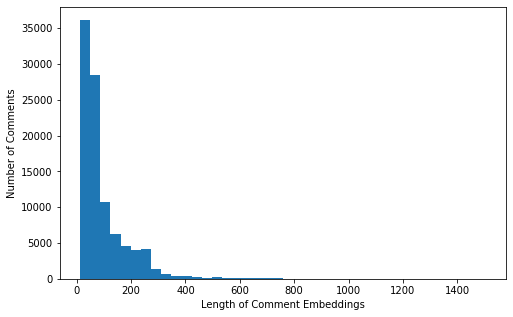

In [91]:
# Run BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)

#convert text to values
train_text_list = train["text"].values
test_text_list = test["text"].values

#plot train text length
plot_sentence_embeddings_length(train_text_list, tokenizer)

In [92]:
# create input id tokens
train_input_ids = tokenize_inputs(train_text_list, tokenizer, num_embeddings=250)
test_input_ids = tokenize_inputs(test_text_list, tokenizer, num_embeddings=250)

# create attention masks
train_attention_masks = create_attn_masks(train_input_ids)
test_attention_masks = create_attn_masks(test_input_ids)

# add input ids and attention masks to the dataframe
train["features"] = train_input_ids.tolist()
train["masks"] = train_attention_masks

test["features"] = test_input_ids.tolist()
test["masks"] = test_attention_masks

In [93]:
# train valid split - train_bert and train_valid will be used in the modelling section
train_bert, valid_bert = train_test_split(train, test_size=0.2, random_state=42)

# Code - Models

## Basic Machine Learning - Logistic Regression

In [112]:
logreg = LogisticRegression(C=12.0, max_iter=1000, )

submission_binary = pd.DataFrame()

for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_base[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_binary[label] = test_y_prob

... Processing category_Defence
Training accuracy is 0.9826399836786172
... Processing category_Education & Culture
Training accuracy is 0.9848841738227275
... Processing category_Energy & Environment
Training accuracy is 0.9740341636218632
... Processing category_General
Training accuracy is 0.9364393419515181
... Processing category_Health & Care
Training accuracy is 0.9717065118608231
... Processing category_Infrastructure & Construction
Training accuracy is 0.9135244913478123
... Processing category_Professional Services
Training accuracy is 0.9562290186768552
... Processing category_Technology & Communications
Training accuracy is 0.9681269358458371
... Processing category_Transport & Logistics
Training accuracy is 0.9666060797151177


**Kaggle Predictions**

In [113]:
submission_binary = submission_binary.round(0)

In [114]:
df_strings=pd.DataFrame(submission_binary,columns=['category_Defence','category_Education & Culture',
                                                  'category_Energy & Environment','category_General',
                                                  'category_Health & Care',
                                                  'category_Infrastructure & Construction',
                                                  'category_Professional Services',
                                                  'category_Technology & Communications',
                                                  'category_Transport & Logistics'])

In [115]:
df_strings['category_Defence']=df_strings['category_Defence'].astype(int)
df_strings['category_Education & Culture']=df_strings['category_Education & Culture'].astype(int)
df_strings['category_Energy & Environment']=df_strings['category_Energy & Environment'].astype(int)
df_strings['category_General']=df_strings['category_General'].astype(int)
df_strings['category_Health & Care']=df_strings['category_Health & Care'].astype(int)
df_strings['category_Infrastructure & Construction']=df_strings['category_Infrastructure & Construction'].astype(int)
df_strings['category_Professional Services']=df_strings['category_Professional Services'].astype(int)
df_strings['category_Technology & Communications']=df_strings['category_Technology & Communications'].astype(int)
df_strings['category_Transport & Logistics']=df_strings['category_Transport & Logistics'].astype(int)

In [116]:
df_strings['category_Defence']=df_strings['category_Defence'].astype(str)
df_strings['category_Education & Culture']=df_strings['category_Education & Culture'].astype(str)
df_strings['category_Energy & Environment']=df_strings['category_Energy & Environment'].astype(str)
df_strings['category_General']=df_strings['category_General'].astype(str)
df_strings['category_Health & Care']=df_strings['category_Health & Care'].astype(str)
df_strings['category_Infrastructure & Construction']=df_strings['category_Infrastructure & Construction'].astype(str)
df_strings['category_Professional Services']=df_strings['category_Professional Services'].astype(str)
df_strings['category_Technology & Communications']=df_strings['category_Technology & Communications'].astype(str)
df_strings['category_Transport & Logistics']=df_strings['category_Transport & Logistics'].astype(str)

In [117]:
df_strings['label']=df_strings[['category_Defence','category_Education & Culture','category_Energy & Environment',
                               'category_General','category_Health & Care','category_Infrastructure & Construction',
                               'category_Professional Services','category_Technology & Communications',
                               'category_Transport & Logistics']].agg(''.join,axis=1)

In [118]:

df_strings = df_strings.drop(['category_Defence','category_Education & Culture','category_Energy & Environment',
                               'category_General','category_Health & Care','category_Infrastructure & Construction',
                               'category_Professional Services','category_Technology & Communications',
                               'category_Transport & Logistics'], axis=1)

In [119]:
test_data = test_base.copy()
output=pd.merge(test_data, df_strings, left_index=True, right_index=True)
output

,description,label
0,pflege und anpassung skoka bw 1 1 2021 31 12 2...,000000100
1,vergabeverfahren der stadt mühlacker zur verga...,000001000
2,für die gruppe hel der abteilung aco werden fü...,000000001
3,stahlbauarbeiten inkl trapezblecharbeiten beim...,000001000
4,die verbandsgemeinde weißenthurm ist trägerin ...,000001000
...,...,...
24576,planungsleistung für die sanierung und den tei...,000001000
24577,beabsichtigung der vergabe von leistungen staa...,000001000
24578,sanitärinstallation nach din 18381 bauleistung...,000001000
24579,im zuge der erweiterung des rhein sieg forums ...,000001000


In [120]:
#output.to_csv('submission_multi_logistic.csv',index=False)

## Dense Deep Network (3 layer)

In [135]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]

EPOCHS = 200
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [136]:
def three_layer_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(50, activation='selu', input_shape=(train_features.shape[-1],), kernel_initializer="lecun_normal"),
      keras.layers.Dropout(0.5),      
      keras.layers.Dense(50, activation='selu', kernel_initializer="lecun_normal"),
      keras.layers.Dropout(0.5),   
      keras.layers.Dense(50, activation='selu', kernel_initializer="lecun_normal"),
      keras.layers.Dropout(0.5),               
      keras.layers.Dense(9, activation='sigmoid',
                         bias_initializer=output_bias),
  ])    

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model 

In [137]:
print(tf.__version__)

2.4.1


In [138]:
import tensorflow as tf
from keras import backend as K
model=three_layer_model()
history = model.fit(
    train_features_dense, train_labels_dense,
    steps_per_epoch=20,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features_dense,val_labels_dense))

Epoch 1/200
20/20 [==============================] - 7s 201ms/step - loss: 1.0788 - tp: 19813.5238 - fp: 122579.5714 - tn: 149871.4762 - fn: 17926.0000 - accuracy: 0.5406 - precision: 0.1362 - recall: 0.5194 - auc: 0.5474 - val_loss: 0.5512 - val_tp: 12128.0000 - val_fp: 29319.0000 - val_tn: 94984.0000 - val_fn: 5157.0000 - val_accuracy: 0.7565 - val_precision: 0.2926 - val_recall: 0.7016 - val_auc: 0.7966
Epoch 2/200
20/20 [==============================] - 3s 151ms/step - loss: 0.7877 - tp: 21894.3333 - fp: 97770.9048 - tn: 174650.0952 - fn: 15875.2381 - accuracy: 0.6257 - precision: 0.1787 - recall: 0.5760 - auc: 0.6425 - val_loss: 0.4252 - val_tp: 11390.0000 - val_fp: 17147.0000 - val_tn: 107156.0000 - val_fn: 5895.0000 - val_accuracy: 0.8373 - val_precision: 0.3991 - val_recall: 0.6590 - val_auc: 0.8494
Epoch 3/200
20/20 [==============================] - 3s 149ms/step - loss: 0.6084 - tp: 22317.4286 - fp: 69901.2857 - tn: 202556.5714 - fn: 15415.2857 - accuracy: 0.7177 - precisio

FINAL EVALUATION

In [146]:
test_predictions = model.predict(test_features_dense)
test_predictions=test_predictions.round(0)

It can be seen in the confusion matrix that the model only predicts some of the classes, which just happen to coincide with the classes that have the most instances in the training data.

In [148]:
multilabel_confusion_matrix(test_labels_dense, test_predictions)

array([[[19219,     0],
        [  445,     0]],

       [[18995,     0],
        [  669,     0]],

       [[18059,     0],
        [ 1355,   250]],

       [[17846,     0],
        [ 1818,     0]],

       [[18361,     0],
        [  922,   381]],

       [[ 7891,    31],
        [ 1728, 10014]],

       [[18041,     0],
        [ 1341,   282]],

       [[18738,     0],
        [  926,     0]],

       [[18204,     0],
        [ 1213,   247]]])

In [142]:
Evaluate(three_layer_model)

loss :  0.17037628591060638
tp :  11174.0
fp :  31.0
tn :  155354.0
fn :  10417.0
accuracy :  0.9409632682800293
precision :  0.9972333908081055
recall :  0.5175304412841797
auc :  0.9300528764724731


<function __main__.Evaluate>

In [149]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_dense, test_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       445
           1       0.00      0.00      0.00       669
           2       1.00      0.16      0.27      1605
           3       0.00      0.00      0.00      1818
           4       1.00      0.29      0.45      1303
           5       1.00      0.85      0.92     11742
           6       1.00      0.17      0.30      1623
           7       0.00      0.00      0.00       926
           8       1.00      0.17      0.29      1460

   micro avg       1.00      0.52      0.68     21591
   macro avg       0.56      0.18      0.25     21591
weighted avg       0.82      0.52      0.59     21591
 samples avg       0.57      0.55      0.56     21591



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [153]:
#generate predictions
test_predictions_kaggle=model.predict(test_features_dense)
test_predictions_kaggle=test_predictions_kaggle.round(0)

## LSTM Network

In [42]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.15, random_state = 42)

In [43]:
# In our case the input sequences are words and we have approximately 6000 words per instance. However, a reasonable limit of 250-500 max sequence length is often used in practice with large LSTM models.
MAXLEN = 500 

# For building this model we'll use the Keras functional API and not the common used Sequential() model. This is because with this API it's possible to build more complex models, such as multi-output and multi-inputs problems.
# We will be training our own embeddings using Keras Embedding Layer.
main_input = Input(shape=(MAXLEN,), dtype='int32', name='main_input')
x = Embedding(vocabulary_size, 100, input_length=MAXLEN)(main_input)
x = Dropout(0.3)(x)
x = Conv1D(64, 5, activation='relu')(x) # A Convolutional layer was added before the LSTM in order to speed-up the training time.
x = MaxPooling1D(pool_size=4)(x)
x = LSTM(100)(x)
x = Dropout(0.3)(x)

In [44]:
# A Dense layer is created for each of ouput. The corresponding metrics and losses for each output will also be stored into dictionaries.
output_array = []
metrics_array = {}
loss_array = {}
# The code below iterates through each of the output binary columns and creates a dense layer.
for i, dense_layer in enumerate(train_labels_names):
    name = f'binary_output_{i}'
    binary_output = Dense(1, activation='sigmoid', name=name)(x)
    output_array.append(binary_output)
    metrics_array[name] = 'binary_accuracy'
    loss_array[name] = 'binary_crossentropy'

y_train_output = []
for col in train_labels_names:
    y_train_output.append(y_train[col])

In [45]:
# For each output we define the weight for each class in a dictionary format (class 5 is different from the rest)
weight_binary = {0: 0.5, 1: 10} # these values are obtained through calculations
weight_binary5={0:1,1:0.8} # these values are obtained through calculations
classes_weights = {}
classes_weights[0]=weight_binary
classes_weights[1]=weight_binary
classes_weights[2]=weight_binary
classes_weights[3]=weight_binary
classes_weights[4]=weight_binary
classes_weights[5]=weight_binary5
classes_weights[6]=weight_binary
classes_weights[7]=weight_binary
classes_weights[8]=weight_binary

In [46]:
# Implement early stopping to help limit overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

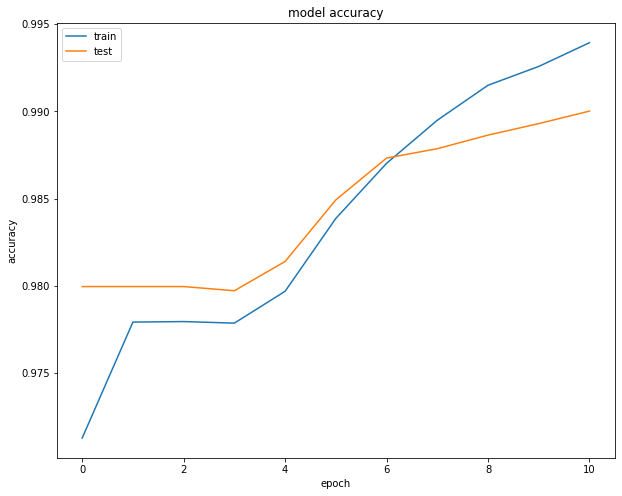

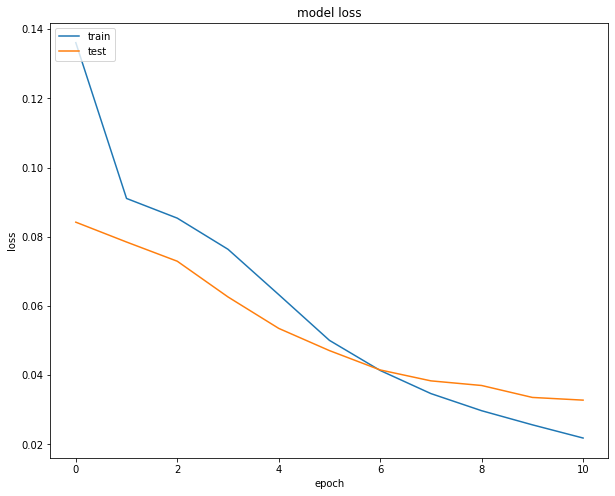

The plot above illustrates that after 6 epochs, the model begins to overfit to the training data.

In [47]:
# Instantiate a Model class and train the model
model = Model(inputs=main_input, outputs=output_array)

model.compile(optimizer='adam',
              loss=loss_array,
              metrics = metrics_array)

history=model.fit(X_train, y_train_output,
          epochs=6, batch_size=512, class_weight=classes_weights, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Train on 66857 samples, validate on 16715 samples
Epoch 1/6
66857/66857 [==============================] - 243s 4ms/step - loss: 2.5112 - binary_output_0_loss: 0.1502 - binary_output_1_loss: 0.1749 - binary_output_2_loss: 0.2943 - binary_output_3_loss: 0.3407 - binary_output_4_loss: 0.2546 - binary_output_5_loss: 0.4925 - binary_output_6_loss: 0.2944 - binary_output_7_loss: 0.2191 - binary_output_8_loss: 0.2877 - binary_output_0_binary_accuracy: 0.9640 - binary_output_1_binary_accuracy: 0.9605 - binary_output_2_binary_accuracy: 0.9159 - binary_output_3_binary_accuracy: 0.8907 - binary_output_4_binary_accuracy: 0.9299 - binary_output_5_binary_accuracy: 0.7167 - binary_output_6_binary_accuracy: 0.9126 - binary_output_7_binary_accuracy: 0.9362 - binary_output_8_binary_accuracy: 0.9230 - val_loss: 1.7081 - val_binary_output_0_loss: 0.0881 - val_binary_output_1_loss: 0.1161 - val_binary_output_2_loss: 0.2317 - val_binary_output_3_loss: 0.2696 - val_binary_output_4_loss: 0.1895 - val_binary_

FINAL EVALUATION

Since the dataset is quite imbalanced, the F1 score is used to evaluate the model performance, since this metric takes into account both precision and recall.

In [48]:
y_pred_test = model.predict(X_test)

In [49]:
THRESHOLD=0.5  #threshold between classes
f1_score_results = []
# Binary Outputs
for col_idx, col in enumerate(train_labels_names):    
    # Transform array of probabilities to class: 0 or 1
    y_pred_test[col_idx][y_pred_test[col_idx]>=THRESHOLD] = 1
    y_pred_test[col_idx][y_pred_test[col_idx]<THRESHOLD] = 0

for col_idx, col in enumerate(train_labels_names):
    print(f'{col} accuracy \n')
    f1_score_results.append(f1_score(y_test[col], y_pred_test[col_idx], average='macro'))
    print(classification_report(y_test[col], y_pred_test[col_idx]))

Defence accuracy 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14406
           1       0.92      0.30      0.45       342

    accuracy                           0.98     14748
   macro avg       0.95      0.65      0.72     14748
weighted avg       0.98      0.98      0.98     14748

Education accuracy 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14254
           1       0.95      0.80      0.87       494

    accuracy                           0.99     14748
   macro avg       0.97      0.90      0.93     14748
weighted avg       0.99      0.99      0.99     14748

Energy accuracy 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13603
           1       0.95      0.88      0.91      1145

    accuracy                           0.99     14748
   macro avg       0.97      0.94      0.95     14748
weighted avg    

In [50]:
test_predictions = y_pred_test

In [51]:
#For evaluation
arr0=test_predictions[0]
arr1=test_predictions[1]
arr2=test_predictions[2]
arr3=test_predictions[3]
arr4=test_predictions[4]
arr5=test_predictions[5]
arr6=test_predictions[6]
arr7=test_predictions[7]
arr8=test_predictions[8]

In [52]:
column_values=['Defence','Education','Energy','General',
                                                  'Health',
                                                  'Infrastructure',
                                                  'Professional',
                                                  'Technology',
                                                  'Transport']

In [53]:
# Dataframe created to extract the "multilabel_confusion_matrix" and the "classification_report"
df = pd.DataFrame(np.hstack((arr0,arr1, arr2, arr3,arr4,arr5,arr6,arr7,arr8)),columns=column_values)

In [54]:
# Multilabel confusion matrix
multilabel_confusion_matrix(df, y_test)

array([[[14397,   240],
        [    9,   102]],

       [[14233,   100],
        [   21,   394]],

       [[13549,   134],
        [   54,  1011]],

       [[13305,   370],
        [   78,   995]],

       [[13751,   145],
        [   35,   817]],

       [[ 5779,   195],
        [   93,  8681]],

       [[13442,   157],
        [   62,  1087]],

       [[14032,   139],
        [   77,   500]],

       [[13592,    93],
        [   22,  1041]]])

In [55]:
# Classification report
print(classification_report(df, y_test))

              precision    recall  f1-score   support

           0       0.30      0.92      0.45       111
           1       0.80      0.95      0.87       415
           2       0.88      0.95      0.91      1065
           3       0.73      0.93      0.82      1073
           4       0.85      0.96      0.90       852
           5       0.98      0.99      0.98      8774
           6       0.87      0.95      0.91      1149
           7       0.78      0.87      0.82       577
           8       0.92      0.98      0.95      1063

   micro avg       0.90      0.97      0.94     15079
   macro avg       0.79      0.94      0.85     15079
weighted avg       0.92      0.97      0.94     15079
 samples avg       0.94      0.97      0.95     15079



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PREDICTIONS

In [56]:
lstm_predictions_kaggle=model.predict(real_test_features)

In [57]:
Arr0=lstm_predictions_kaggle[0].round(0)
Arr1=lstm_predictions_kaggle[1].round(0)
Arr2=lstm_predictions_kaggle[2].round(0)
Arr3=lstm_predictions_kaggle[3].round(0)
Arr4=lstm_predictions_kaggle[4].round(0)
Arr5=lstm_predictions_kaggle[5].round(0)
Arr6=lstm_predictions_kaggle[6].round(0)
Arr7=lstm_predictions_kaggle[7].round(0)
Arr8=lstm_predictions_kaggle[8].round(0)

Add the predictions to one DataFrame called "df_strings"

In [58]:
df_strings = pd.DataFrame(np.hstack((Arr0,Arr1, Arr2, Arr3,Arr4,Arr5,Arr6,Arr7,Arr8)),columns=column_values)

Convert the predictions of each class to strings

In [59]:
df_strings['Defence']=df_strings['Defence'].astype(int)
df_strings['Education']=df_strings['Education'].astype(int)
df_strings['Energy']=df_strings['Energy'].astype(int)
df_strings['General']=df_strings['General'].astype(int)
df_strings['Health']=df_strings['Health'].astype(int)
df_strings['Infrastructure']=df_strings['Infrastructure'].astype(int)
df_strings['Professional']=df_strings['Professional'].astype(int)
df_strings['Technology']=df_strings['Technology'].astype(int)
df_strings['Transport']=df_strings['Transport'].astype(int)

In [60]:
df_strings['Defence']=df_strings['Defence'].astype(str)
df_strings['Education']=df_strings['Education'].astype(str)
df_strings['Energy']=df_strings['Energy'].astype(str)
df_strings['General']=df_strings['General'].astype(str)
df_strings['Health']=df_strings['Health'].astype(str)
df_strings['Infrastructure']=df_strings['Infrastructure'].astype(str)
df_strings['Professional']=df_strings['Professional'].astype(str)
df_strings['Technology']=df_strings['Technology'].astype(str)
df_strings['Transport']=df_strings['Transport'].astype(str)

Create a column called "label" to enter the 0s or 1s of each class together in one column




In [61]:
df_strings['label']=df_strings[['Defence','Education','Energy','General','Health','Infrastructure','Professional','Technology','Transport']].agg(''.join,axis=1)

In [62]:
df_strings = df_strings.drop(['Defence','Education','Energy','General','Health','Infrastructure','Professional','Technology','Transport'], axis=1)

In [63]:
real_test_docid=real_test_docid.to_frame()

Merge together in a DataFrame called "output" the "docid" column extracted before from the test dataset and the "label" column

In [64]:
output=pd.merge(real_test_docid, df_strings, left_index=True, right_index=True)

Export the final DataFrame called "output" which contains the columns "docid" and "label" with the same format as requested by kaggle

In [65]:
#output.to_csv('lstm.csv', index = False)
#files.download("lstm.csv")

## GRU Network

In [166]:
# Same architecture as LSTM
# In our case the input sequences are words and we have approximately 6000 words per instance. However, a reasonable limit of 250-600 max sequence length is often used in practice with large LSTM models.
MAXLEN = 500 

# For building this model we'll use the Keras functional API and not the common used Sequential() model. This is because with this API it's possible to build more complex models, such as multi-output and multi-inputs problems.
# We will be training our own embeddings using Keras Embedding Layer.
main_input = Input(shape=(MAXLEN,), dtype='int32', name='main_input')
x = Embedding(vocabulary_size, 100, input_length=MAXLEN)(main_input)
x = Dropout(0.3)(x)
x = Conv1D(64, 5, activation='relu')(x) #A Convolutional layer was added before the LSTM in order to speed-up the training time.
x = MaxPooling1D(pool_size=4)(x)
x = GRU(100)(x)
x = Dropout(0.3)(x)

In [167]:
# A Dense layer is created for each of ouput. The corresponding metrics and losses for each output will also be stored into dictionaries.
output_array = []
metrics_array = {}
loss_array = {}
# The code below iterates through each of the output binary columns and creates a dense layer.
for i, dense_layer in enumerate(train_labels_names):
    name = f'binary_output_{i}'
    binary_output = Dense(1, activation='sigmoid', name=name)(x)
    output_array.append(binary_output)
    metrics_array[name] = 'binary_accuracy'
    loss_array[name] = 'binary_crossentropy'

y_train_output = []
for col in train_labels_names:
    y_train_output.append(y_train[col])

In [168]:
# For each output we define the weight for each class in a dictionary format (class 5 is different from the rest)
weight_binary = {0: 0.5, 1: 10} # these values are obtained through calculations
weight_binary5={0:1,1:0.8} # these values are obtained through calculations
classes_weights = {}
classes_weights[0]=weight_binary
classes_weights[1]=weight_binary
classes_weights[2]=weight_binary
classes_weights[3]=weight_binary
classes_weights[4]=weight_binary
classes_weights[5]=weight_binary5
classes_weights[6]=weight_binary
classes_weights[7]=weight_binary
classes_weights[8]=weight_binary

In [169]:
# Implement early stopping to help limit overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [170]:
# Instantiate a Model class and train the model
model = Model(inputs=main_input, outputs=output_array)

model.compile(optimizer='adam',
              loss=loss_array,
              metrics = metrics_array)

history=model.fit(X_train, y_train_output,
          epochs=6, batch_size=512, class_weight=classes_weights, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Train on 66857 samples, validate on 16715 samples
Epoch 1/6
27136/66857 [===========>..................] - ETA: 2:11 - loss: 3.2949 - binary_output_0_loss: 0.2258 - binary_output_1_loss: 0.2714 - binary_output_2_loss: 0.3764 - binary_output_3_loss: 0.3983 - binary_output_4_loss: 0.3322 - binary_output_5_loss: 0.6797 - binary_output_6_loss: 0.3668 - binary_output_7_loss: 0.2835 - binary_output_8_loss: 0.3608 - binary_output_0_binary_accuracy: 0.9680 - binary_output_1_binary_accuracy: 0.9278 - binary_output_2_binary_accuracy: 0.9092 - binary_output_3_binary_accuracy: 0.9043 - binary_output_4_binary_accuracy: 0.9279 - binary_output_5_binary_accuracy: 0.5871 - binary_output_6_binary_accuracy: 0.9099 - binary_output_7_binary_accuracy: 0.9499 - binary_output_8_binary_accuracy: 0.9096

KeyboardInterrupt: ignored

FINAL EVALUATION

Since the dataset is quite imbalanced, the F1 score is used to evaluate the model performance, since this metric takes into account both precision and recall.

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
THRESHOLD=0.5  #threshold between classes
f1_score_results = []
# Binary Outputs
for col_idx, col in enumerate(train_labels_names):    
    # Transform array of probabilities to class: 0 or 1
    y_pred_test[col_idx][y_pred_test[col_idx]>=THRESHOLD] = 1
    y_pred_test[col_idx][y_pred_test[col_idx]<THRESHOLD] = 0

for col_idx, col in enumerate(train_labels_names):
    print(f'{col} accuracy \n')
    f1_score_results.append(f1_score(y_test[col], y_pred_test[col_idx], average='macro'))
    print(classification_report(y_test[col], y_pred_test[col_idx]))

In [ ]:
test_predictions = y_pred_test

In [ ]:
#For evaluation
arr0=test_predictions[0]
arr1=test_predictions[1]
arr2=test_predictions[2]
arr3=test_predictions[3]
arr4=test_predictions[4]
arr5=test_predictions[5]
arr6=test_predictions[6]
arr7=test_predictions[7]
arr8=test_predictions[8]


In [ ]:
column_values=['Defence','Education','Energy','General',
                                                  'Health',
                                                  'Infrastructure',
                                                  'Professional',
                                                  'Technology',
                                                  'Transport']

In [ ]:
# Dataframe created to extract the "multilabel_confusion_matrix" and the "classification_report"
df = pd.DataFrame(np.hstack((arr0,arr1, arr2, arr3,arr4,arr5,arr6,arr7,arr8)),columns=column_values)

In [ ]:
# Multilabel confusion matrix
multilabel_confusion_matrix(df, y_test)

In [ ]:
# Classification report
print(classification_report(df, y_test))

PREDICTIONS

In [ ]:
gru_predictions_kaggle=model.predict(real_test_features)

In [ ]:
Arr0=gru_predictions_kaggle[0].round(0)
Arr1=gru_predictions_kaggle[1].round(0)
Arr2=gru_predictions_kaggle[2].round(0)
Arr3=gru_predictions_kaggle[3].round(0)
Arr4=gru_predictions_kaggle[4].round(0)
Arr5=gru_predictions_kaggle[5].round(0)
Arr6=gru_predictions_kaggle[6].round(0)
Arr7=gru_predictions_kaggle[7].round(0)
Arr8=gru_predictions_kaggle[8].round(0)

Add the predictions to one DataFrame called "df_strings"

In [ ]:
df_strings = pd.DataFrame(np.hstack((Arr0,Arr1, Arr2, Arr3,Arr4,Arr5,Arr6,Arr7,Arr8)),columns=column_values)

Convert the predictions of each class to strings

In [ ]:
df_strings['Defence']=df_strings['Defence'].astype(int)
df_strings['Education']=df_strings['Education'].astype(int)
df_strings['Energy']=df_strings['Energy'].astype(int)
df_strings['General']=df_strings['General'].astype(int)
df_strings['Health']=df_strings['Health'].astype(int)
df_strings['Infrastructure']=df_strings['Infrastructure'].astype(int)
df_strings['Professional']=df_strings['Professional'].astype(int)
df_strings['Technology']=df_strings['Technology'].astype(int)
df_strings['Transport']=df_strings['Transport'].astype(int)

In [ ]:
df_strings['Defence']=df_strings['Defence'].astype(str)
df_strings['Education']=df_strings['Education'].astype(str)
df_strings['Energy']=df_strings['Energy'].astype(str)
df_strings['General']=df_strings['General'].astype(str)
df_strings['Health']=df_strings['Health'].astype(str)
df_strings['Infrastructure']=df_strings['Infrastructure'].astype(str)
df_strings['Professional']=df_strings['Professional'].astype(str)
df_strings['Technology']=df_strings['Technology'].astype(str)
df_strings['Transport']=df_strings['Transport'].astype(str)

Create a column called "label" to enter the 0s or 1s of each class together in one column




In [ ]:
df_strings['label']=df_strings[['Defence','Education','Energy','General','Health','Infrastructure','Professional','Technology','Transport']].agg(''.join,axis=1)

In [ ]:
df_strings = df_strings.drop(['Defence','Education','Energy','General','Health','Infrastructure','Professional','Technology','Transport'], axis=1)

In [ ]:
real_test_docid=real_test_docid.to_frame()

Merge together in a DataFrame called "output" the "docid" column extracted before from the test dataset and the "label" column

In [ ]:
output=pd.merge(real_test_docid, df_strings, left_index=True, right_index=True)

Export the final DataFrame called "output" which contains the columns "docid" and "label" with the same format as requested by kaggle

In [ ]:
#output.to_csv('gru.csv', index = False)
#files.download("gru.csv")

## BERT Model

In [ ]:
X_train = train_bert["features"].values.tolist()
X_valid = valid_bert["features"].values.tolist()

train_masks = train_bert["masks"].values.tolist()
valid_masks = valid_bert["masks"].values.tolist()

label_cols=['Defence','Education','Energy','General','Health','Infrastructure','Professional','Technology','Transport']
Y_train = train_bert[label_cols].values.tolist()
Y_valid = valid_bert[label_cols].values.tolist()

In [ ]:
# create dataloaders
# Convert all of our input ids and attention masks into 
# torch tensors, the required datatype for our model

X_train = torch.tensor(X_train)
X_valid = torch.tensor(X_valid)

Y_train = torch.tensor(Y_train, dtype=torch.float32)
Y_valid = torch.tensor(Y_valid, dtype=torch.float32)

train_masks = torch.tensor(train_masks, dtype=torch.long)
valid_masks = torch.tensor(valid_masks, dtype=torch.long)

In [ ]:
# Select a batch size for training
batch_size = 16

# Create an iterator of our data with torch DataLoader. This helps save on 
# memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(X_train, train_masks, Y_train)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data,\
                              sampler=train_sampler,\
                              batch_size=batch_size)

validation_data = TensorDataset(X_valid, valid_masks, Y_valid)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data,\
                                   sampler=validation_sampler,\
                                   batch_size=batch_size)

In [ ]:
# create function for training bert model
def train(model, num_epochs,\
          optimizer,\
          train_dataloader, valid_dataloader,\
          train_loss_set=[], valid_loss_set = [],\
          lowest_eval_loss=None, start_epoch=0,\
          device="cpu"
          ):
  """
  Train the model and save the model with the lowest validation loss
  """

  model.to(device)

  # trange is a tqdm wrapper around the normal python range
  for i in trange(num_epochs, desc="Epoch"):
    # if continue training from saved model
    actual_epoch = start_epoch + i

    # Training

    # Set our model to training mode (as opposed to evaluation mode)
    model.train()

    # Tracking variables
    tr_loss = 0
    num_train_samples = 0

    # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      # Clear out the gradients (by default they accumulate)
      optimizer.zero_grad()
      # Forward pass
      loss = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
      # store train loss
      tr_loss += loss.item()
      num_train_samples += b_labels.size(0)
      # Backward pass
      loss.backward()
      # Update parameters and take a step using the computed gradient
      optimizer.step()
      #scheduler.step()

    # Update tracking variables
    epoch_train_loss = tr_loss/num_train_samples
    train_loss_set.append(epoch_train_loss)

    print("Train loss: {}".format(epoch_train_loss))

    # Validation

    # Put model in evaluation mode to evaluate loss on the validation set
    model.eval()

    # Tracking variables 
    eval_loss = 0
    num_eval_samples = 0

    # Evaluate data for one epoch
    for batch in valid_dataloader:
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      # Telling the model not to compute or store gradients,
      # saving memory and speeding up validation
      with torch.no_grad():
        # Forward pass, calculate validation loss
        loss = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        # store valid loss
        eval_loss += loss.item()
        num_eval_samples += b_labels.size(0)

    epoch_eval_loss = eval_loss/num_eval_samples
    valid_loss_set.append(epoch_eval_loss)

    print("Valid loss: {}".format(epoch_eval_loss))

    if lowest_eval_loss == None:
      lowest_eval_loss = epoch_eval_loss
      # save model
      #save_model(model, model_save_path, actual_epoch,\
       #          lowest_eval_loss, train_loss_set, valid_loss_set)
    else:
      if epoch_eval_loss < lowest_eval_loss:
        lowest_eval_loss = epoch_eval_loss
        # save model
        #save_model(model, model_save_path, actual_epoch,\
         #          lowest_eval_loss, train_loss_set, valid_loss_set)
    print("\n")

  return model, train_loss_set, valid_loss_set

In [ ]:
# empty torch cache
torch.cuda.empty_cache()

In [ ]:
# create class for bert model architecture
class BertforMultiLabelSequenceClassification(torch.nn.Module):
  
  def __init__(self, num_labels=2):
    super(BertforMultiLabelSequenceClassification, self).__init__()
    self.num_labels = num_labels
    self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
    self.dropout = torch.nn.Dropout(p=0.1)
    self.classifier = torch.nn.Linear(768, num_labels)

    torch.nn.init.xavier_normal_(self.classifier.weight)

  def forward(self, input_ids, token_type_ids=None,\
              attention_mask=None, labels=None):
    # last hidden layer
    last_hidden_state = self.bert(input_ids=input_ids,\
                                   attention_mask=attention_mask,\
                                   token_type_ids=token_type_ids)
    # pool the outputs into a mean vector
    mean_last_hidden_state = self.pool_hidden_state(last_hidden_state)
    mean_last_hidden_state = self.dropout(mean_last_hidden_state)
    logits = self.classifier(mean_last_hidden_state)
        
    if labels is not None:
      loss_fct = BCEWithLogitsLoss()
      loss = loss_fct(logits.view(-1, self.num_labels),\
                      labels.view(-1, self.num_labels))
      return loss
    else:
      return logits
    
  def freeze_bert_decoder(self):
    """
    Freeze BERT weight parameters. They will not be updated during training.
    """
    for param in self.bert.parameters():
      param.requires_grad = False
    
  def unfreeze_bert_decoder(self):
    """
    Unfreeze BERT weight parameters. They will be updated during training.
    """
    for param in self.bert.parameters():
      param.requires_grad = True
    
  def pool_hidden_state(self, last_hidden_state):
    """
    Pool the output vectors into a single mean vector 
    """
    last_hidden_state = last_hidden_state[0]
    mean_last_hidden_state = torch.mean(last_hidden_state, 1)
    return mean_last_hidden_state

In [ ]:
class WarmupLinearSchedule(LambdaLR):
    """ Linear warmup and then linear decay.
        Linearly increases learning rate from 0 to 1 over `warmup_steps` training steps.
        Linearly decreases learning rate from 1. to 0. over remaining `t_total - warmup_steps` steps.
    """
    def __init__(self, optimizer, warmup_steps, t_total, last_epoch=-1):
        self.warmup_steps = warmup_steps
        self.t_total = t_total
        super(WarmupLinearSchedule, self).__init__(optimizer, self.lr_lambda, last_epoch=last_epoch)

    def lr_lambda(self, step):
        if step < self.warmup_steps:
            return float(step) / float(max(1, self.warmup_steps))
        return max(0.0, float(self.t_total - step) / float(max(1.0, self.t_total - self.warmup_steps)))

In [ ]:
# assign model and optimizer
model = BertforMultiLabelSequenceClassification(num_labels=len(Y_train[0]))
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01, correct_bias=False)

In [ ]:
# assign number of epochs and run Bert model
num_epochs=3
model, train_loss_set, valid_loss_set = train(model=model,\
                                              num_epochs=num_epochs,\
                                              optimizer=optimizer,\
                                              train_dataloader=train_dataloader,\
                                              valid_dataloader=validation_dataloader,\
                                              device="cuda")

In [ ]:
# Plot loss
num_epochs = np.arange(len(train_loss_set))

fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(train_loss_set), label="Train Loss")
ax.plot(num_epochs, np.array(valid_loss_set), 'g-', label="Valid Loss")
#ax1.plot(episode_record, lose_record, 'r-', label="Lose %")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Number of Epochs")

In [ ]:
# create function for generating predictions for kaggle
def generate_predictions(model, df, num_labels, device="cpu", batch_size=32):
  num_iter = math.ceil(df.shape[0]/batch_size)
  
  pred_probs = np.array([]).reshape(0, num_labels)
  
  model.to(device)
  model.eval()
  
  for i in range(num_iter):
    df_subset = df.iloc[i*batch_size:(i+1)*batch_size,:]
    X = df_subset["features"].values.tolist()
    masks = df_subset["masks"].values.tolist()
    X = torch.tensor(X)
    masks = torch.tensor(masks, dtype=torch.long)
    X = X.to(device)
    masks = masks.to(device)
    with torch.no_grad():
      logits = model(input_ids=X, attention_mask=masks)
      logits = logits.sigmoid().detach().cpu().numpy()
      pred_probs = np.vstack([pred_probs, logits])
  
  return pred_probs

In [ ]:
# generate predictictions 
pred_probs = generate_predictions(model, test, len(label_cols), device="cuda", batch_size=32)

label_cols=['Defence','Education','Energy','General','Health','Infrastructure','Professional','Technology','Transport']

test["Defence"] = pred_probs[:,0]
test["Education"] = pred_probs[:,1]
test["Energy"] = pred_probs[:,2]
test["General"] = pred_probs[:,3]
test["Health"] = pred_probs[:,4]
test["Infrastructure"] = pred_probs[:,5]
test["Professional"] = pred_probs[:,6]
test["Technology"] = pred_probs[:,7]
test["Transport"] = pred_probs[:,8]

test_to_csv = test.reset_index()

In [ ]:
# pre-process data
test_to_csv = test_to_csv.drop(["text", "masks","features", "index"], axis=1)

In [ ]:
# process df for submission
test_to_csv= test_to_csv.astype(int)
test_to_csv= test_to_csv.astype(str)
test_to_csv['label']=test_to_csv[label_cols].agg(''.join,axis=1)
test_to_csv = test_to_csv.drop([label_cols], axis=1)

In [ ]:
test_to_csv.head()

In [ ]:
#test_to_csv.to_csv("Bert_Predictions.csv", index=False)